In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from zipfile import ZipFile 

In [2]:
# importing libraries for Deep Learning
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]="2"
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50

In [3]:
#git data from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# links

test_dir="/content/drive/MyDrive/check scope /training_set"
train_dir="/content/drive/MyDrive/check scope /training_set"
train_dir_cats = train_dir + '/scope-on'
train_dir_dogs = train_dir + '/scope-off'
test_dir_cats = test_dir + '/scope-on'
test_dir_dogs = test_dir + '/scope-off'

In [6]:
# visualise data
print('number of cats training images - ',len(os.listdir(train_dir_cats)))
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  383
number of dogs training images -  426
number of cats testing images -  383
number of dogs testing images -  426


In [7]:
BATCH_SIZE = 32
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)


In [8]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range = 0.2,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  vertical_flip = True,
                                  fill_mode = 'nearest',
                                  validation_split = 0.1)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size = BATCH_SIZE,
                                                   class_mode = 'binary',
                                                   shuffle = True,
                                                   subset = 'training',
                                                   seed = 2)

Found 724 images belonging to 2 classes.


In [9]:
validation_generator = train_datagen.flow_from_directory(train_dir,
                                                        target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                        batch_size = BATCH_SIZE,
                                                        class_mode = 'binary',
                                                        subset = 'validation',
                                                        shuffle = True,
                                                        seed = 2)

Found 80 images belonging to 2 classes.


In [10]:
 # extruct img fetures
data_generator = ImageDataGenerator(rescale = 1.0/255.0, zoom_range = 0.2)

In [11]:
batch_size = 1
training_data = data_generator.flow_from_directory(directory = train_dir,
                                                   target_size = (256, 256),
                                                   batch_size = batch_size,
                                                   class_mode = 'binary')
testing_data = data_generator.flow_from_directory(directory = test_dir,
                                                  target_size = (64, 64),
                                                  batch_size = batch_size,
                                                  class_mode = 'binary')

Found 804 images belonging to 2 classes.
Found 804 images belonging to 2 classes.


In [12]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : scope-off
1 : scope-on


In [13]:
# creat cnn model
base_model = VGG16(input_shape = IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False
inputs = Input(shape = IMG_SHAPE)

x = base_model(inputs, training = False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs = inputs, outputs = outputs)

58900480/58889256 [==============================] - 0s 0us/step


In [14]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                            factor=np.sqrt(0.1),
                             patience=5)

In [15]:
base_learning_rate = 0.001
optimizer = Adam(learning_rate=base_learning_rate)

In [16]:
model.compile(
    optimizer = optimizer,
    loss = BinaryCrossentropy(),
    metrics = ['accuracy']
)

In [17]:
initial_epochs = 20

checkpoint_path = "/content/drive/MyDrive/check scope /cp.ckpt"

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
history = model.fit(
    train_generator,
    epochs=initial_epochs,
    validation_data=validation_generator,
    callbacks=[reduce_lr, cp_callback]
)

Epoch 1/20
23/23 [==============================] - ETA: 0s - loss: 0.7377 - accuracy: 0.5290 
Epoch 1: saving model to /content/drive/MyDrive/check scope /cp.ckpt
23/23 [==============================] - 603s 26s/step - loss: 0.7377 - accuracy: 0.5290 - val_loss: 0.6378 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/20
23/23 [==============================] - ETA: 0s - loss: 0.6537 - accuracy: 0.5787 
Epoch 2: saving model to /content/drive/MyDrive/check scope /cp.ckpt
23/23 [==============================] - 560s 24s/step - loss: 0.6537 - accuracy: 0.5787 - val_loss: 0.5921 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 3/20
23/23 [==============================] - ETA: 0s - loss: 0.6070 - accuracy: 0.6616 
Epoch 3: saving model to /content/drive/MyDrive/check scope /cp.ckpt
23/23 [==============================] - 561s 24s/step - loss: 0.6070 - accuracy: 0.6616 - val_loss: 0.5388 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 4/20
23/23 [==============================] - ETA: 0s - loss: 0.5451 -

In [18]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

In [19]:
# plotting accuracy and validation accuracy
# acc 25 epochs
accuracy = fitted_model.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'bo', label = 'accuracy')
plt.legend()

NameError: ignored

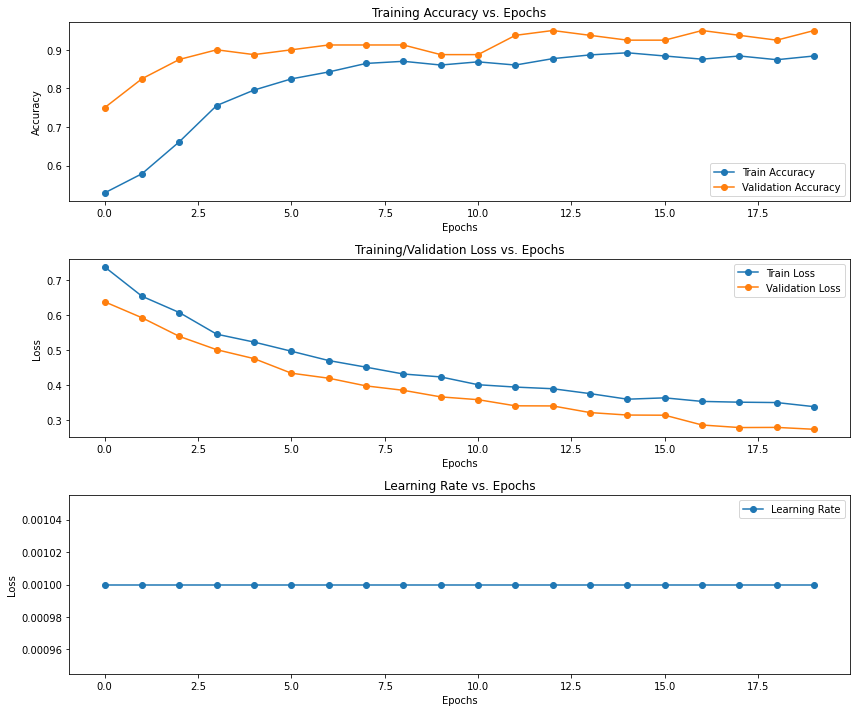

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [21]:
# predict for img 
def testing_image(image_directory):
    test_image = image.load_img(image_directory, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  == 1:
        prediction = 'scope on'
    else:
        prediction = 'scope off'
    return prediction

In [22]:
print(testing_image(train_dir_dogs + '/images223.jpg'))

ValueError: ignored